# 1 SPECTRAL CLUSTERING

Use Cases:
Spectral Clustering is particularly useful in cases where data is not linearly separable, and traditional clustering methods like k-means may not perform well. It is effective in detecting clusters with complex shapes and dealing with non-convex structures. Some applications include image segmentation, social network analysis, and document clustering.

Mathematical Fundamentals:
Graph Laplacian: The foundation of spectral clustering lies in creating a graphical representation of data, where data points are nodes and edges represent relationships between them. The Laplacian matrix of this graph captures properties of its structure. There are different types of Laplacians, such as the unnormalized, normalized, and random walk Laplacian.
Eigenvalue Decomposition: Spectral clustering involves finding the eigenvectors and eigenvalues of the Laplacian matrix. These eigenvectors are then used to transform the data into a new space, where clustering is performed.

Spectral Clustering Algorithm:
Affinity Matrix: Construct an affinity matrix based on similarity/distance between pairs of data points.
Graph Construction: Create a graph using the affinity matrix, where nodes represent data points and edges represent relationships.
Laplacian Matrix: Compute the Laplacian matrix of the graph.
Eigen-Decomposition: Find the eigenvalues and corresponding eigenvectors of the Laplacian matrix.
K-Means on Eigenvectors: Use the eigenvectors corresponding to the k smallest eigenvalues (where k is the number of clusters) and apply k-means clustering in this reduced-dimensional space.

I find a connection with what was covered in class because Spectral Clustering and K-Means are related in the sense that Spectral Clustering utilizes K-Means in a transformed space for the final clustering. This integration leverages the capability of K-Means to assign points to clusters with the flexibility of Spectral Clustering to handle more complex and non-linear structures in the data.

# 2 DBSCAN

Use Cases:
DBSCAN is especially useful in cases where clusters have variable shapes, sizes, and densities. It excels in identifying clusters in datasets with irregular shapes and noise. It is effective when clusters are not well-separated, and the density of clusters is uneven. DBSCAN is robust to outliers and is capable of discovering clusters of arbitrary shapes.

Mathematical Fundamentals:
Core Points, Border Points, and Noise:
Core Point: A point is a core point if it has at least a specified number of points (MinPts) within a specified radius (Eps).
Border Point: A point is a border point if it is within the specified radius of a core point but does not have enough neighbors to be considered a core point itself.
Noise Point: A point is a noise point (outlier) if it is neither a core point nor a border point.
Density Reachability:
Two points are density-reachable if there is a chain of core points connecting them.
Density Connectivity:
Two points are density-connected if there is a common core point that makes them density-reachable.

Relation with Spectral Clustering:
DBSCAN and Spectral Clustering address clustering differently. DBSCAN is a density-based algorithm that does not assume spherical clusters and can discover clusters of arbitrary shapes. On the other hand, Spectral Clustering is based on graph theory and eigenvalue decomposition, often applied when clusters have complex structures.
There is no direct mathematical or conceptual relation between DBSCAN and Spectral Clustering. They serve different purposes, with DBSCAN focusing on density-based clustering and Spectral Clustering on spectral decomposition and graph theory.

# 3 Elbow method


The elbow method in clustering is a technique used to determine the optimal number of clusters in a dataset. It is done by plotting the sum of squared distances of each point to the centroid of its respective cluster for different values of k (number of clusters). The idea is to identify the "elbow point" on the graph, where the decrease in distance significantly slows down, suggesting that adding more clusters will not provide a substantial improvement in the clustering quality. The elbow method has some limitations, and therefore, it should not be solely relied upon for determining the number of clusters.

Subjectivity in Elbow Point Identification:
Identifying the elbow point on the graph can be subjective and dependent on the analyst's interpretation. In some cases, there may not be a clear elbow point.

Dependence on Data Distribution:
The effectiveness of the elbow method depends on the distribution of the data. In situations where the density of clusters varies considerably, the method may not accurately reflect the optimal number of clusters.

Neglect of Variance:
The elbow method is based on the sum of squared distances of points to the centroid, which may not be sensitive to variance within clusters. Clusters with higher variance may be underestimated.

Difficulty in High-Dimensional Data:
In high-dimensional datasets, visualization and interpretation of the graph can be challenging, making it difficult to identify the elbow point.


#  5

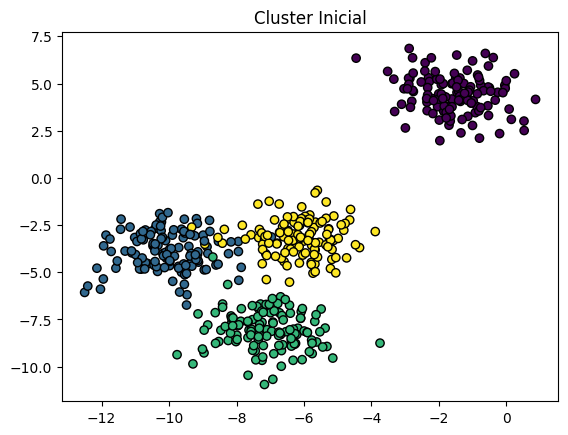

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

from unsupervised_package.Kmeans import KMeans
from unsupervised_package.Kmedoids import KMedoids
# Resto del código para generar datos y llamar a la función K-Means
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title('Cluster Inicial')
plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, silhouette_samples

from unsupervised_package.Kmeans import KMeans
from unsupervised_package.Kmedoids import KMedoids

def graficar_silueta(X, n_clusters, labels, sample_silhouette_values, axes):
    silhouette_avg = silhouette_score(X, labels)
    """
    Plot silhouette scores for each cluster in a dataset.

    Parameters:
    - X (array): Dataset.
    - n_clusters (int): Number of clusters.
    - labels (array): Cluster labels assigned to each data point.
    - sample_silhouette_values (array): Silhouette scores for individual data points.
    - axes (array): Matrix of axes for subplot visualization.

    Returns:
    - None: The function directly performs silhouette plot on the provided axes.

    The function calculates the average silhouette score and plots silhouette scores for each cluster.
    """
    row = (n_clusters - 2) // 2
    col = (n_clusters - 2) % 2

    y_lower = 10
    for j in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == j]
        ith_cluster_silhouette_values.sort()

        size_cluster_j = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        color = plt.cm.nipy_spectral(float(j) / n_clusters)
        axes[row, col].fill_betweenx(np.arange(y_lower, y_upper),
                                      0, ith_cluster_silhouette_values,
                                      facecolor=color, edgecolor=color, alpha=0.7)
        axes[row, col].set_title(f"Clústeres = {n_clusters}\nCoeficiente de silueta = {silhouette_avg:.2f}")

        y_lower = y_upper + 10

    axes[row, col].set_xlim([-0.1, 1])
    axes[row, col].set_ylim([0, len(X) + (n_clusters + 1) * 10])

def graficar_clusters(X, n_clusters, labels, centroids, axes):
    """
    Plot clusters in a two-dimensional dataset.

    Parameters:
    - X (array): Two-dimensional dataset.
    - n_clusters (int): Number of clusters.
    - labels (array): Cluster labels assigned to each data point.
    - centroids (array): Coordinates of the cluster centroids.
    - axes (array): Matrix of axes for subplot visualization.

    Returns:
    - None: The function directly performs visualization on the provided axes.

    The function uses colors to represent different clusters in the two-dimensional dataset.
    """
    row = (n_clusters - 2) // 2
    col = (n_clusters - 2) % 2

    colors = plt.cm.nipy_spectral(labels.astype(float) / n_clusters)
    axes[row, col].scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors)

    axes[row, col].set_title(f"Clústeres = {n_clusters}")



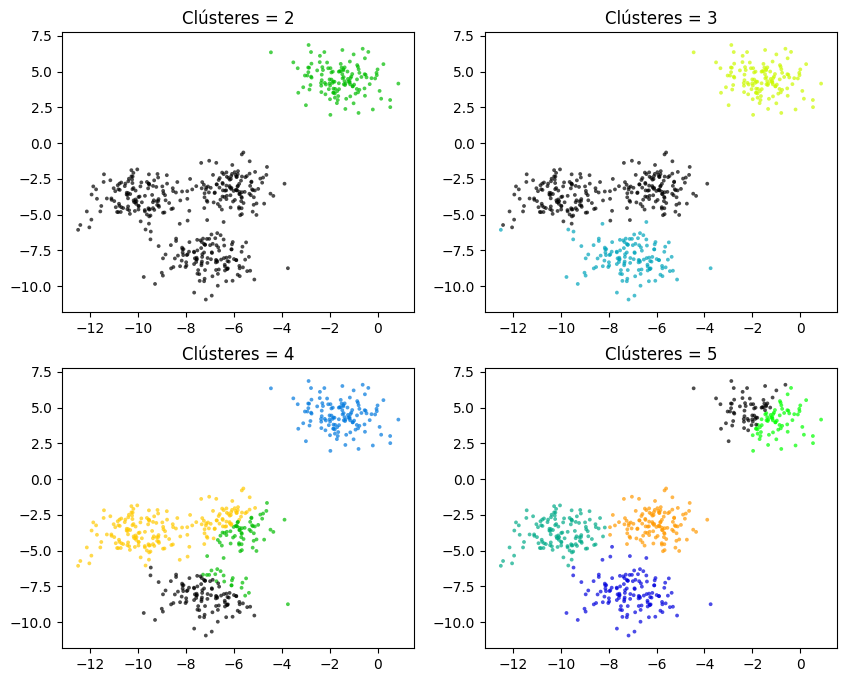

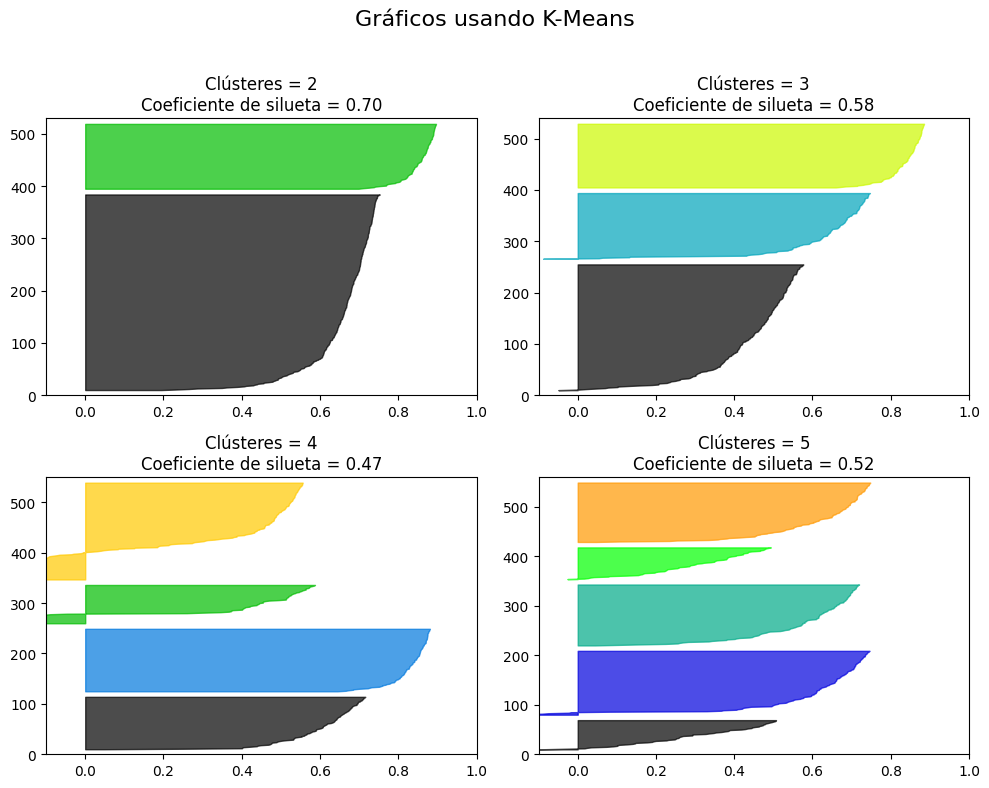

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig2, axes2 = plt.subplots(2, 2, figsize=(10, 8))

for i in range(2, 6):
    n_clusters = i
    kmeans_model = KMeans(n_clusters)
    centroids = kmeans_model.fit(X)
    labels = kmeans_model.predict(X)
    sample_silhouette_values = silhouette_samples(X, labels)
    graficar_clusters(X, n_clusters, labels, centroids, axes)
    graficar_silueta(X, n_clusters, labels, sample_silhouette_values, axes2)

plt.suptitle("Gráficos usando K-Means", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

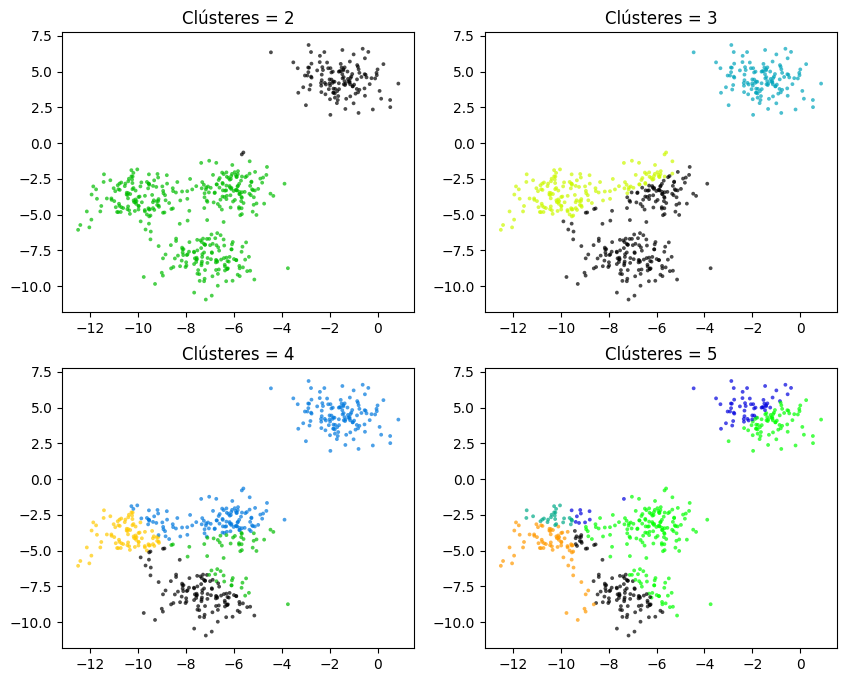

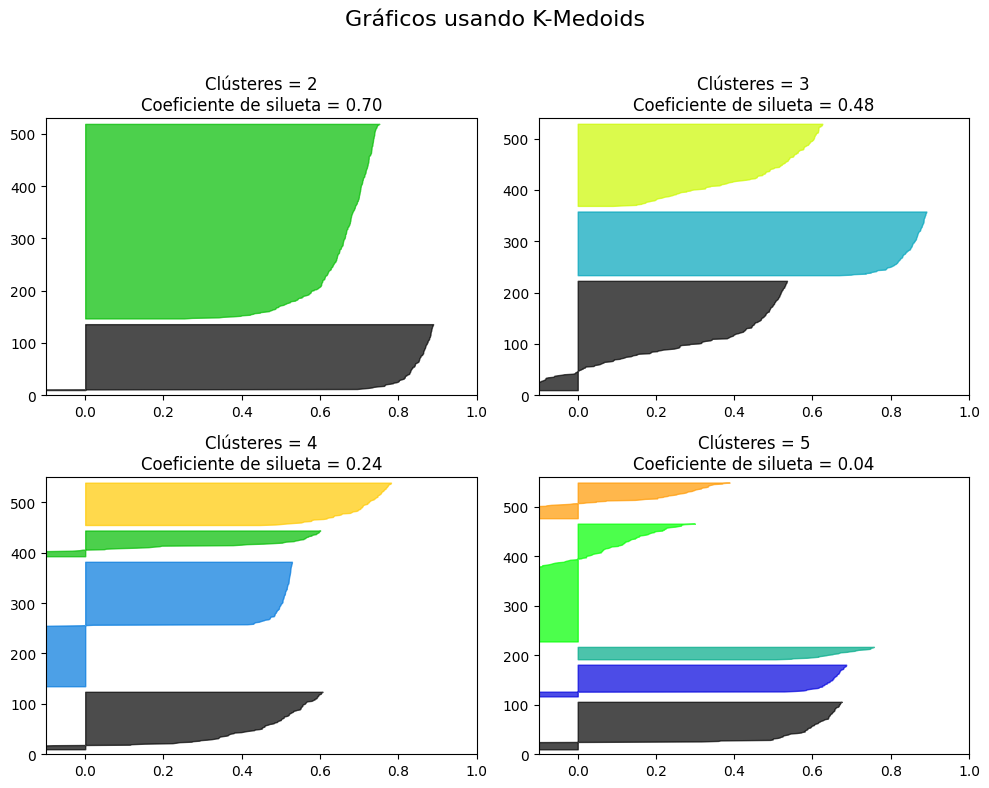

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig2, axes2 = plt.subplots(2, 2, figsize=(10, 8))

for i in range(2, 6):
    n_clusters = i
    kmedoids_model = KMedoids(n_clusters)
    medoids = kmedoids_model.fit(X)
    labels = kmedoids_model.predict(X)
    sample_silhouette_values = silhouette_samples(X, labels)
    graficar_clusters(X, n_clusters, labels, centroids, axes)
    graficar_silueta(X, n_clusters, labels, sample_silhouette_values, axes2)

plt.suptitle("Gráficos usando K-Medoids", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


For values of K ranging from 1 to 5, it was observed that the KMeans model achieved the best results with a value of k equal to 2, obtaining the highest silhouette coefficient, which was 0.7.

However, the results of the applied models did not meet expectations, as the silhouette coefficients turned out to be quite low. To improve these results, one can explore data normalization or seek a different convergence point.

# 6

In [5]:
import numpy as np
from sklearn import cluster, datasets, mixture
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None
# Anisotropically distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
# blobs with varied variances
varied = datasets.make_blobs(
n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

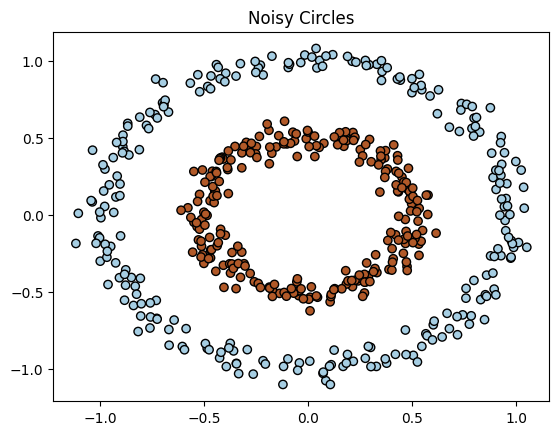

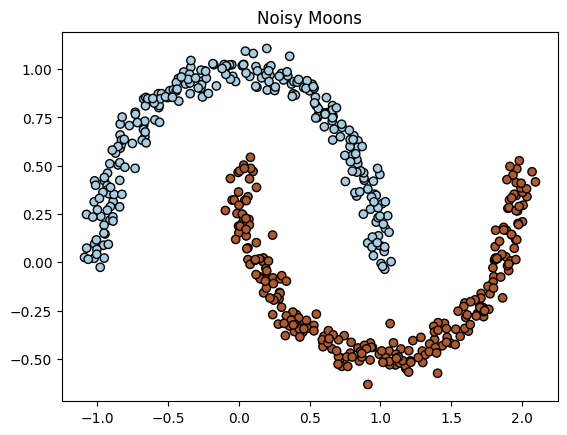

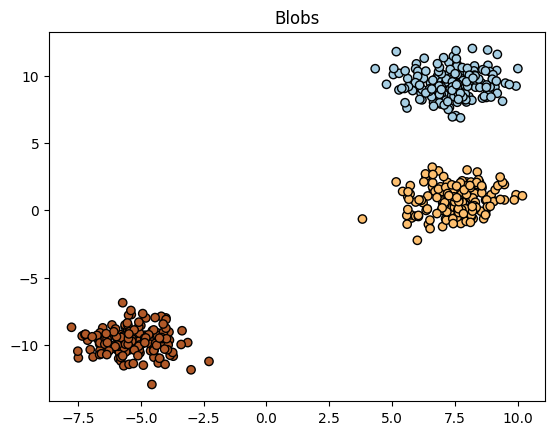

C:\Users\jei_s\AppData\Local\Temp\ipykernel_22992\1919498518.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)


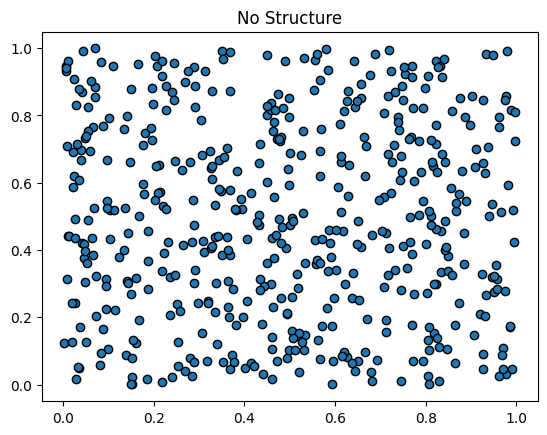

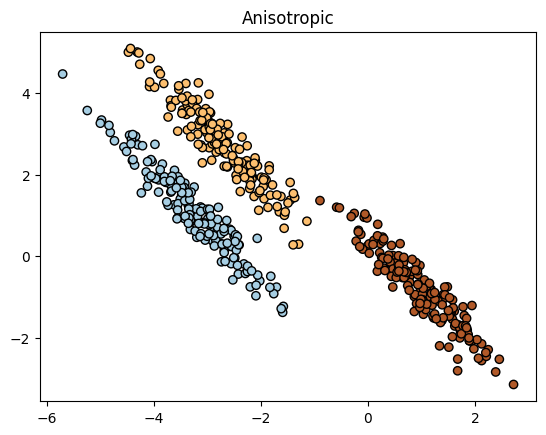

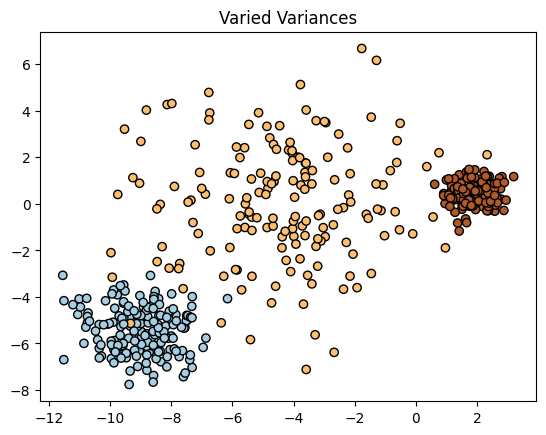

In [6]:
import matplotlib.pyplot as plt

def plot_dataset(X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

# Plot Noisy Circles
plot_dataset(*noisy_circles, "Noisy Circles")

# Plot Noisy Moons
plot_dataset(*noisy_moons, "Noisy Moons")

# Plot Blobs
plot_dataset(*blobs, "Blobs")

# Plot No Structure
plot_dataset(*no_structure, "No Structure")

# Plot Anisotropic
plot_dataset(*aniso, "Anisotropic")

# Plot Varied Variances
plot_dataset(*varied, "Varied Variances")


The above code generates six pre-clustered datasets, each exhibiting distinctive characteristics that set them apart. These datasets simulate various scenarios and data structures that could be encountered in real-world situations.

C:\Users\jei_s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


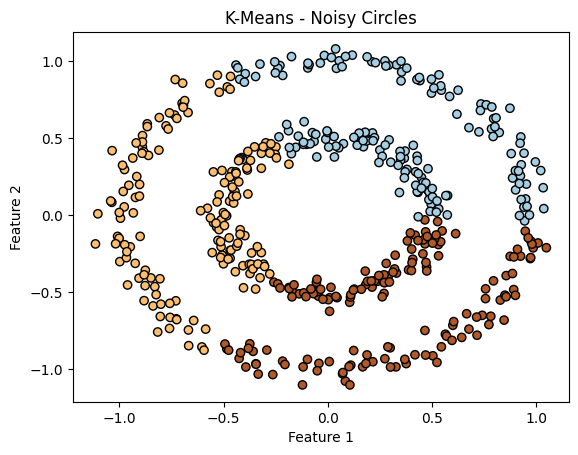

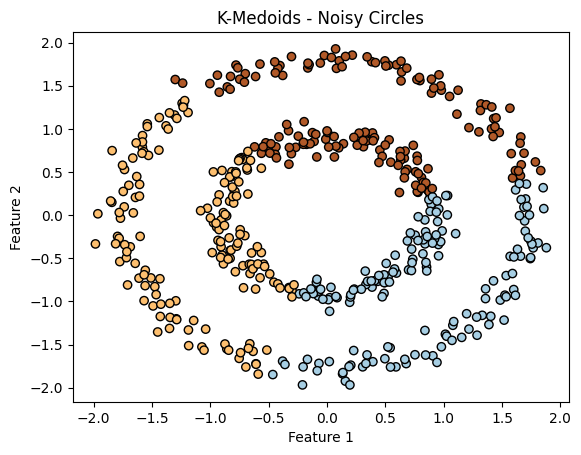

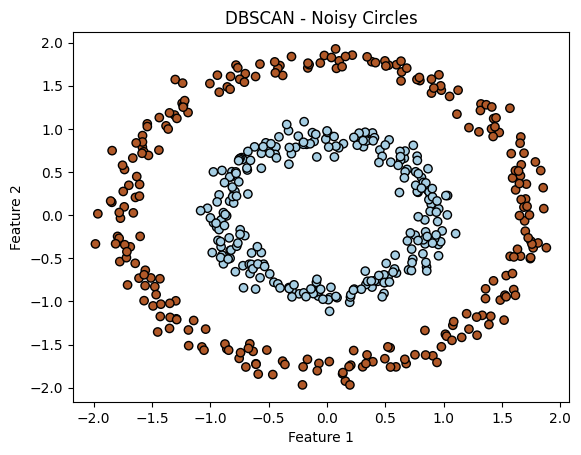

C:\Users\jei_s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


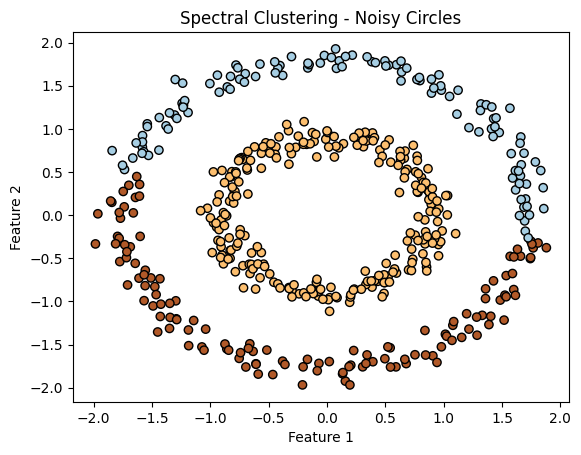

C:\Users\jei_s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


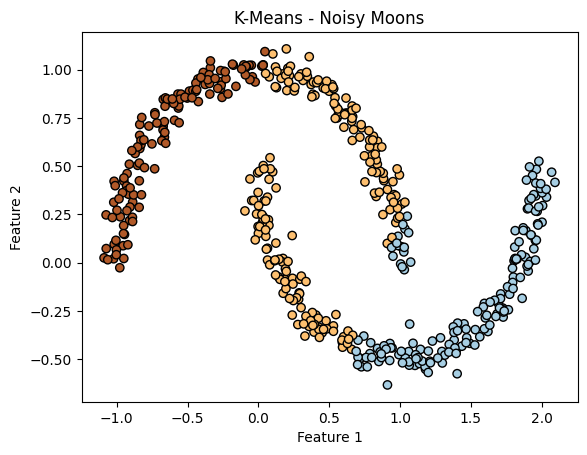

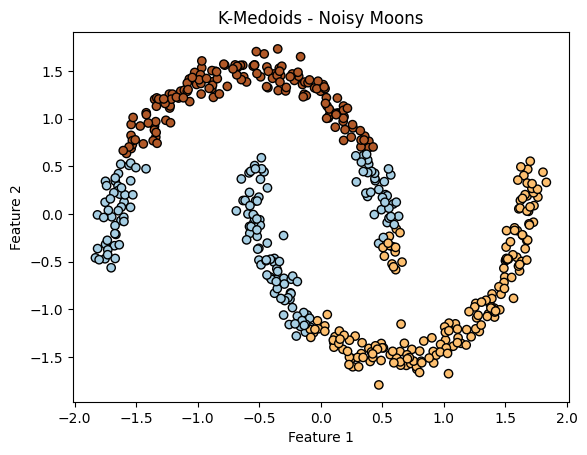

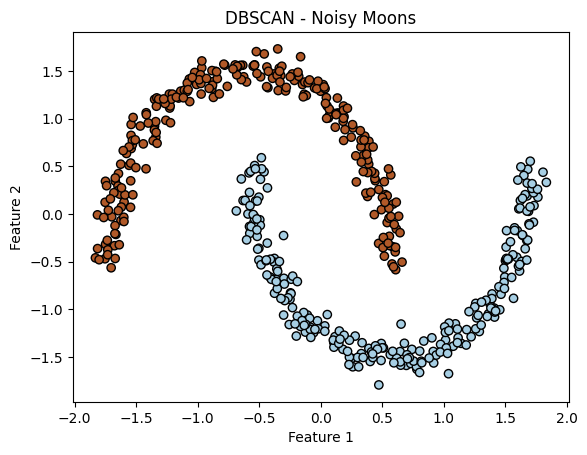

C:\Users\jei_s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


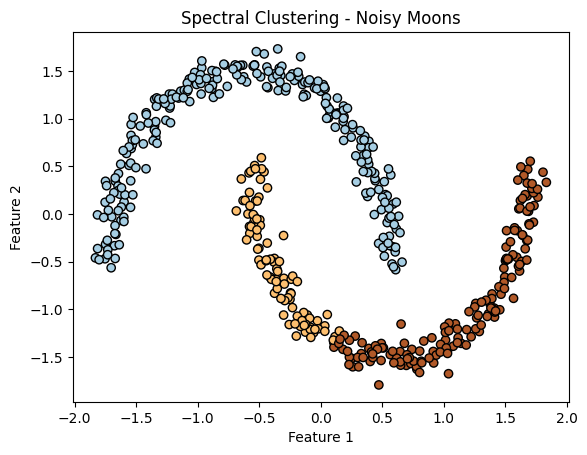

C:\Users\jei_s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


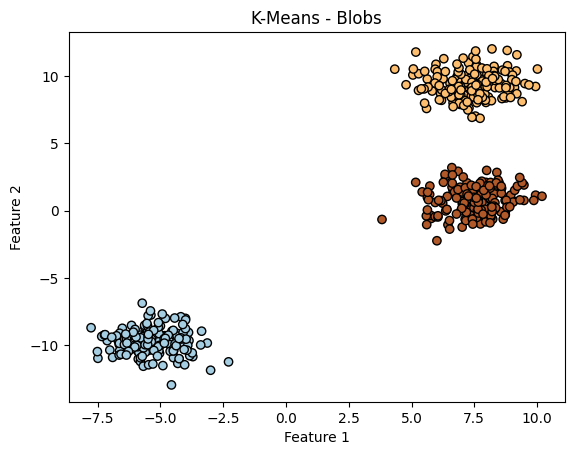

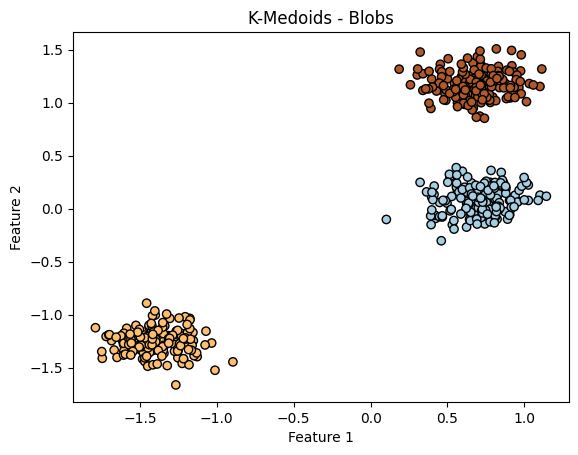

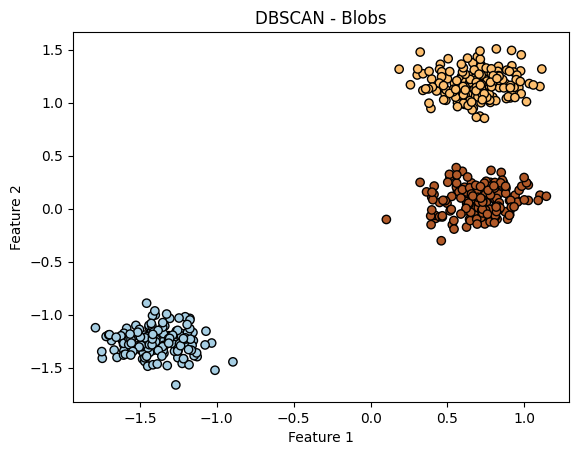

C:\Users\jei_s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


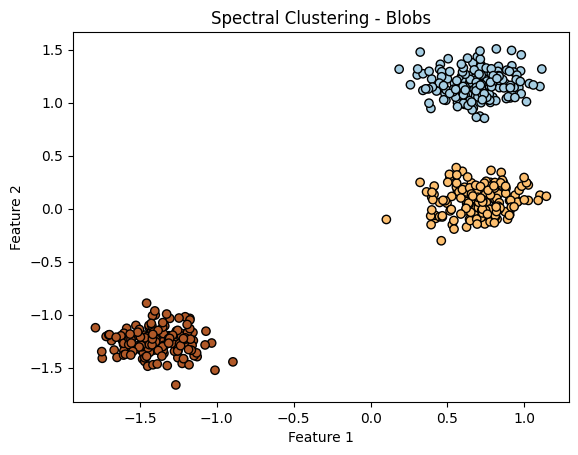

C:\Users\jei_s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


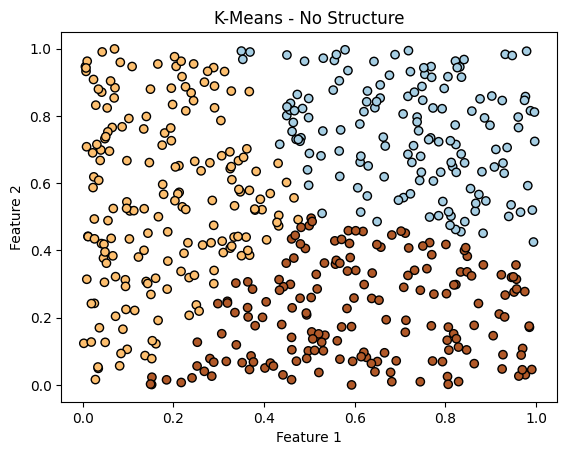

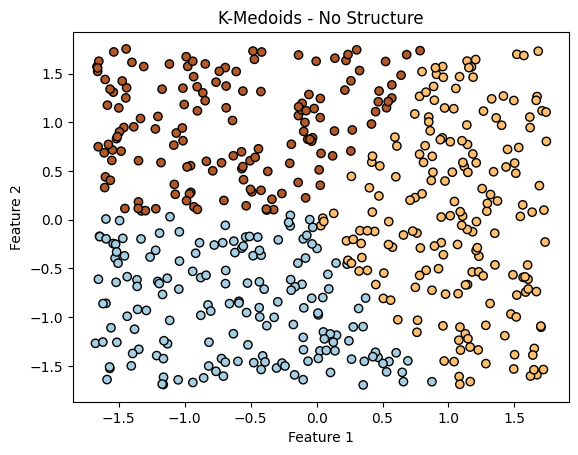

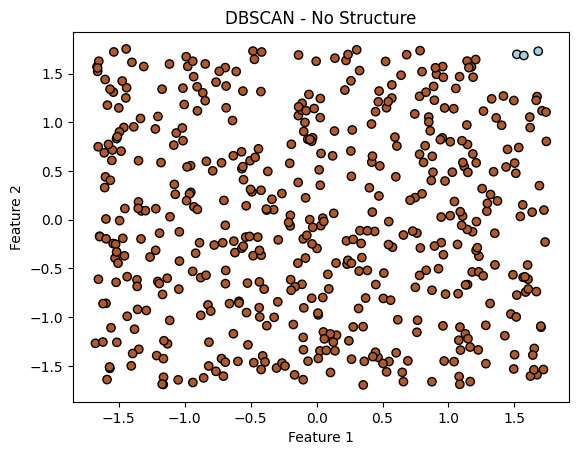

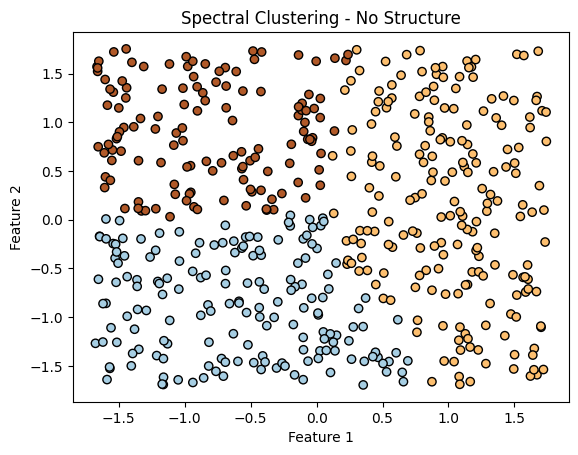

C:\Users\jei_s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


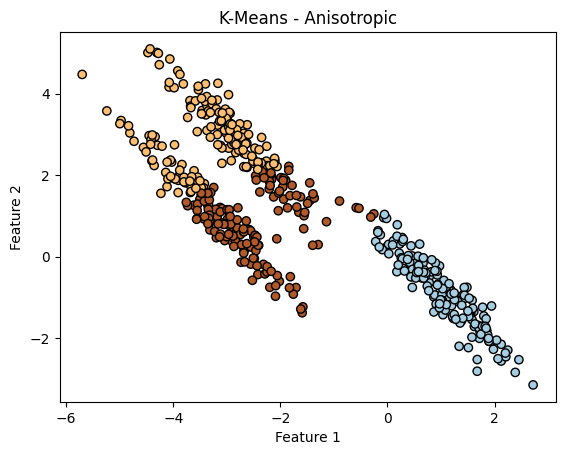

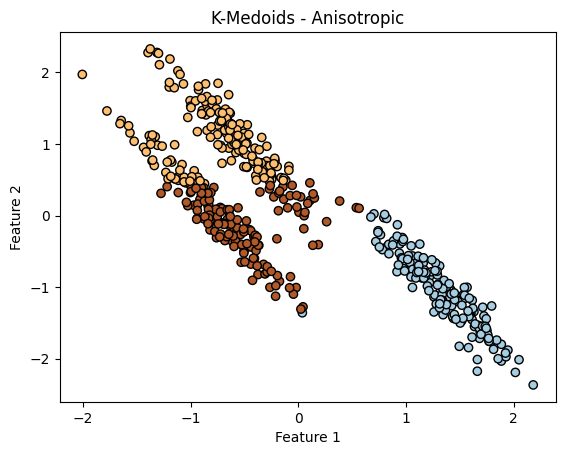

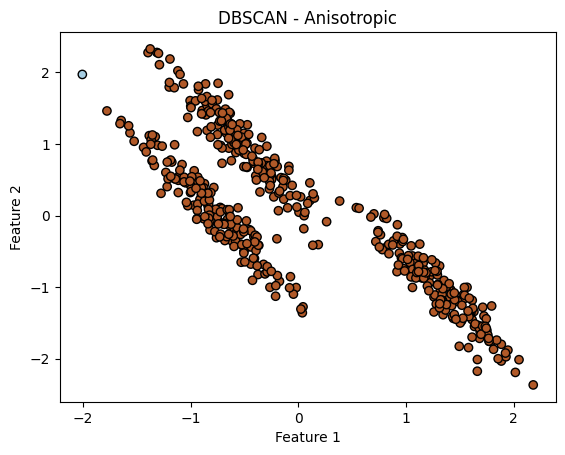

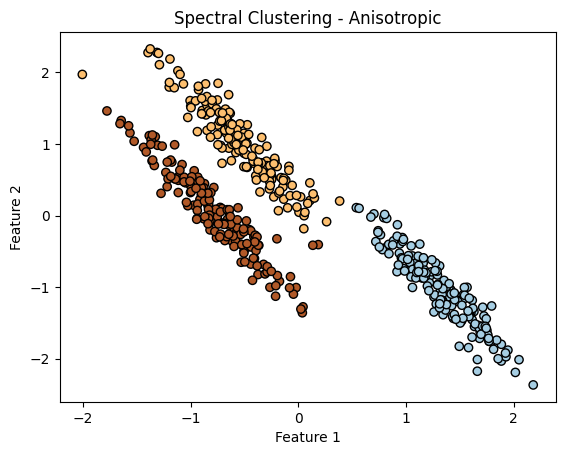

C:\Users\jei_s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


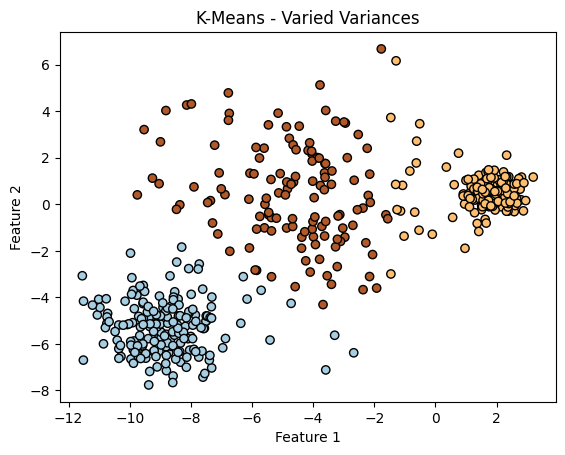

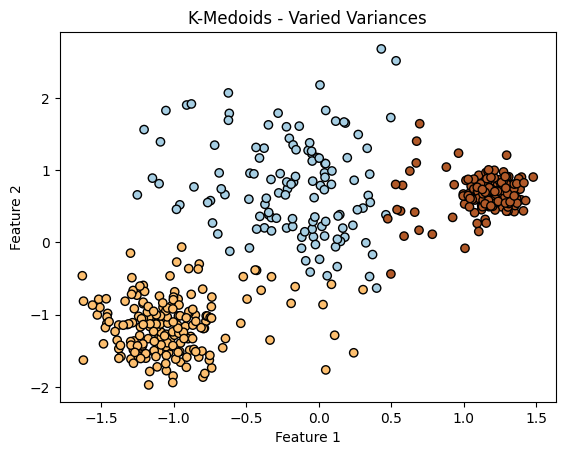

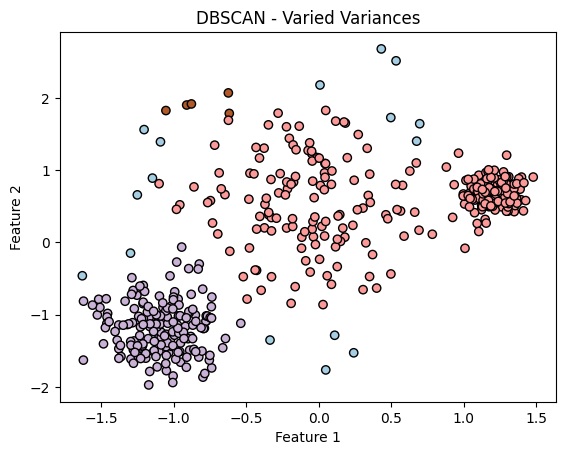

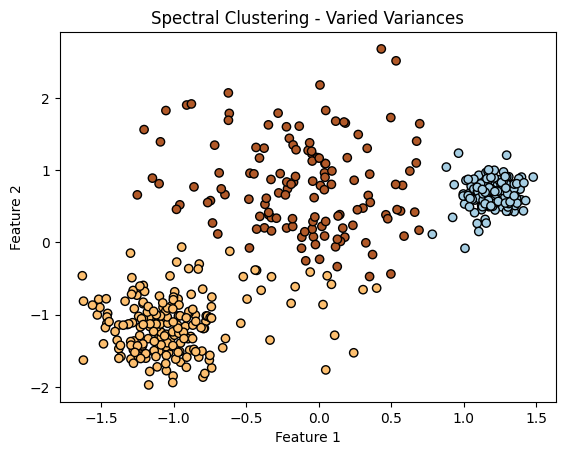

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler

# Función para aplicar y visualizar los resultados de los algoritmos de clustering
def apply_and_visualize_clustering(X, y_true, algorithm, title):
    # Aplicar el algoritmo de clustering
    algorithm.fit(X)
    
    # Obtener las etiquetas predichas
    if hasattr(algorithm, 'labels_'):
        labels = algorithm.labels_
    else:
        labels = algorithm.predict(X)
    
    # Visualizar los resultados
    plt.scatter(X[:, 0], X[:, 1], c=labels, edgecolors='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Conjuntos de datos
datasets = [
    noisy_circles, noisy_moons, blobs, no_structure, aniso, varied
]
dataset_names = ["Noisy Circles", "Noisy Moons", "Blobs", "No Structure", "Anisotropic", "Varied Variances"]

# Configuración de parámetros para los algoritmos
n_clusters = 3  # Número de clústeres para K-Means, K-Medoids y Spectral Clustering
eps = 0.3  # Parámetro de radio para DBSCAN

# Iterar sobre cada conjunto de datos
for dataset, name in zip(datasets, dataset_names):
    X, y_true = dataset
    
    # Estandarizar los datos (importante para algunos algoritmos)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # K-Means
    kmeans = KMeans(n_clusters=n_clusters)
    apply_and_visualize_clustering(X, y_true, kmeans, f"K-Means - {name}")
    
    # K-Medoids
    kmedoids = KMedoids(n_clusters=n_clusters)
    apply_and_visualize_clustering(X_scaled, y_true, kmedoids, f"K-Medoids - {name}")
    
    # DBSCAN
    dbscan = DBSCAN(eps=eps)
    apply_and_visualize_clustering(X_scaled, y_true, dbscan, f"DBSCAN - {name}")
    
    # Spectral Clustering
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors')
    apply_and_visualize_clustering(X_scaled, y_true, spectral, f"Spectral Clustering - {name}")


## Conclusions 6


Noisy Circles and Noisy Moons<br>
When applying clustering models, it is visually evident that the K-Means and K-Medoids models do not achieve effective data grouping. This is due to their assumption of clusters with spherical shapes and similar sizes. On the contrary, DBSCAN and Spectral Clustering show positive results. DBSCAN excels in grouping by dense point regions and can identify clusters with non-conventional shapes. Spectral Clustering, leveraging its ability to project data into a higher-dimensional space, proves effective in identifying non-traditional cluster structures.

Blobs<br>
Applying clustering models such as K-Means, K-Medoids, DBSCAN, and Spectral Clustering to the "blobs" dataset, it was concluded that all models showed effective performance in the clustering task. This is because these datasets consist of groups of points with more or less spherical shapes, similar sizes, and uniform distributions. These characteristics facilitate clustering algorithms in finding and separating clusters clearly, aligning with the assumptions and typical features of these algorithms.


No structure y Varied variances<br>
In the case of the "No structure" and "Varied Variances" datasets, it was observed that applying DBSCAN did not yield good results. This may be because this clustering model is not optimal for datasets with low density or clusters with significantly different variances.

Anisotropic<br>
When applying the models to the anisotropic dataset, it was visually evident that Spectral Clustering was the only one capable of effectively grouping this dataset. This could be attributed to its ability to capture non-linear patterns in the data, allowing it to identify and group clusters with more complex and anisotropic shapes. Additionally, by projecting the data into a higher-dimensional feature space, it transforms the data in a way that anisotropic structures are more clearly defined and separated.